##Mount Google Drive and import libraries

In [1]:
import os
import shutil

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!rm -r sample_data

Mounted at /content/drive


In [2]:
import numpy as np
import skimage.color
import skimage.io
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
from matplotlib import patches
from numpy import arange
import os

##Histograms for intensity 

###Grayscaled Average Histogram for Images

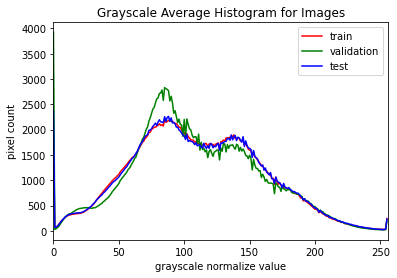

In [3]:
num_images_train=0
num_images_validation=0
num_images_test=0

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/train/*.bmp"):

  image = skimage.io.imread(fname=filename)
  histogram, bin_edges = np.histogram(image, bins=256, range=(0, 256))
  
  if num_images_train==0:
    average_histogram_train=histogram
  average_histogram_train+=histogram
  num_images_train+=1

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/validation/*.bmp"):

  image = skimage.io.imread(fname=filename)
  histogram, bin_edges = np.histogram(image, bins=256, range=(0, 256))
  
  if num_images_validation==0:
    average_histogram_validation=histogram
  average_histogram_validation+=histogram
  num_images_validation+=1

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/test/*.bmp"):

  image = skimage.io.imread(fname=filename)
  histogram, bin_edges = np.histogram(image, bins=256, range=(0, 256))
  
  if num_images_test==0:
    average_histogram_test=histogram
  average_histogram_test+=histogram
  num_images_test+=1

# configure and draw the average_histogram figure
plt.figure()
plt.title("Grayscale Average Histogram for Images")
plt.xlabel("grayscale normalize value")
plt.ylabel("pixel count")
plt.xlim([0, 256])

average_histogram_train=average_histogram_train/(num_images_train*3)
average_histogram_validation=average_histogram_validation/(num_images_validation*3)
average_histogram_test=average_histogram_test/(num_images_test*3)
plt.plot(bin_edges[0:-1], average_histogram_train, label="train", color="red")
plt.plot(bin_edges[0:-1], average_histogram_validation, label="validation", color="green")
plt.plot(bin_edges[0:-1], average_histogram_test, label="test", color="blue")
plt.legend()
plt.show()

###Colored Average Histogram for Images

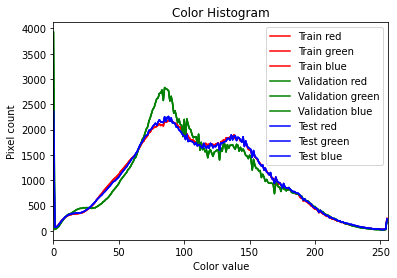

In [ ]:
num_images_train=0
num_images_validation=0
num_images_test=0

# tuple to select colors of each channel line
colors = ("red", "green", "blue")
channel_ids = (0, 1, 2)

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/train/*.bmp"):

  image = skimage.io.imread(fname=filename)

  for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    if c == "red":
      if num_images_train==0:
        average_histogram_train_red=histogram
      average_histogram_train_red+=histogram

    if c == "blue":
      if num_images_train==0:
        average_histogram_train_blue=histogram
      average_histogram_train_blue+=histogram

    if c == "green":
      if num_images_train==0:
        average_histogram_train_green=histogram
      average_histogram_train_green+=histogram

  num_images_train+=1

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/validation/*.bmp"):

  image = skimage.io.imread(fname=filename)

  for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    if c == "red":
      if num_images_validation==0:
        average_histogram_validation_red=histogram
      average_histogram_validation_red+=histogram

    if c == "blue":
      if num_images_validation==0:
        average_histogram_validation_blue=histogram
      average_histogram_validation_blue+=histogram

    if c == "green":
      if num_images_validation==0:
        average_histogram_validation_green=histogram
      average_histogram_validation_green+=histogram

  num_images_validation+=1

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/test/*.bmp"):

  image = skimage.io.imread(fname=filename)

  for channel_id, c in zip(channel_ids, colors):
    histogram, bin_edges = np.histogram(
        image[:, :, channel_id], bins=256, range=(0, 256)
    )
    if c == "red":
      if num_images_test==0:
        average_histogram_test_red=histogram
      average_histogram_test_red+=histogram

    if c == "blue":
      if num_images_test==0:
        average_histogram_test_blue=histogram
      average_histogram_test_blue+=histogram

    if c == "green":
      if num_images_test==0:
        average_histogram_test_green=histogram
      average_histogram_test_green+=histogram

  num_images_test+=1


plt.figure()
plt.title("Color Histogram")
plt.xlabel("Color value")
plt.ylabel("Pixel count")
plt.xlim([0, 256])


average_histogram_train_red   = average_histogram_train_red   / num_images_train
average_histogram_train_green = average_histogram_train_green / num_images_train
average_histogram_train_blue  = average_histogram_train_blue  / num_images_train
plt.plot(bin_edges[0:-1], average_histogram_train_red,   color="red", label="Train red")
plt.plot(bin_edges[0:-1], average_histogram_train_green, color="red", label="Train green")
plt.plot(bin_edges[0:-1], average_histogram_train_blue,  color="red", label="Train blue")

average_histogram_validation_red   = average_histogram_validation_red   / num_images_validation
average_histogram_validation_green = average_histogram_validation_green / num_images_validation
average_histogram_validation_blue  = average_histogram_validation_blue  / num_images_validation
plt.plot(bin_edges[0:-1], average_histogram_validation_red,   color="green", label="Validation red")
plt.plot(bin_edges[0:-1], average_histogram_validation_green, color="green", label="Validation green")
plt.plot(bin_edges[0:-1], average_histogram_validation_blue,  color="green", label="Validation blue")

average_histogram_test_red   = average_histogram_test_red   / num_images_test
average_histogram_test_green = average_histogram_test_green / num_images_test
average_histogram_test_blue  = average_histogram_test_blue  / num_images_test
plt.plot(bin_edges[0:-1], average_histogram_test_red,   color="blue", label="Test red")
plt.plot(bin_edges[0:-1], average_histogram_test_green, color="blue", label="Test green")
plt.plot(bin_edges[0:-1], average_histogram_test_blue,  color="blue", label="Test blue")


plt.legend()
plt.show()

##Bounding Box plots and stats

###Aspect Ratio Histogram of Bounding Box

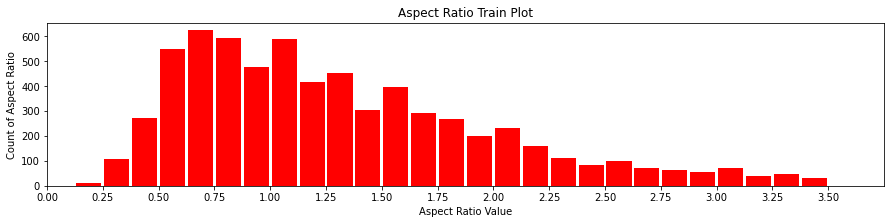

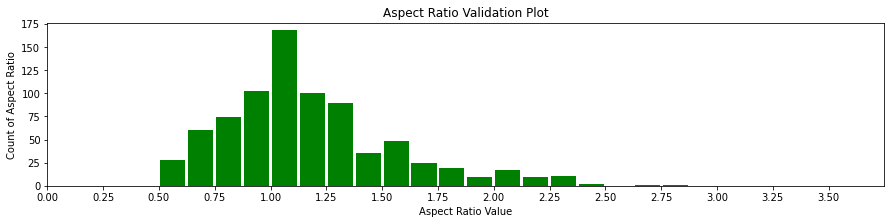

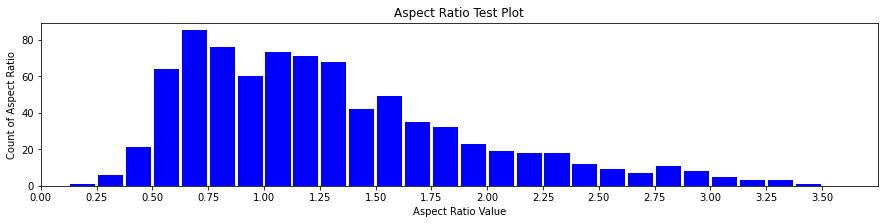

In [ ]:
aspectRatioTrain = []
aspectRatioValidation = []
aspectRatioTest = []

train = pd.read_csv("/content/drive/MyDrive/CVproject_Stenosis/Dataset/CSV/train.csv")

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/train/*.bmp"):

  for _,row in train[train.filename == os.path.basename(filename)].iterrows():

    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax

    aspectRatioTrain.append((xmax-xmin)/(ymax-ymin))

plt.figure(figsize=(15,3))
plt.title("Aspect Ratio Train Plot")
plt.xlabel("Aspect Ratio Value")
plt.ylabel("Count of Aspect Ratio")
plt.xlim(0, 3.75)
plt.xticks(arange(3.75, step=0.25))

plt.hist(aspectRatioTrain, bins=28, range=(0,3.5), rwidth=0.9, color='r')
plt.show()


validation = pd.read_csv("/content/drive/MyDrive/CVproject_Stenosis/Dataset/CSV/validation.csv")

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/validation/*.bmp"):

  for _,row in validation[validation.filename == os.path.basename(filename)].iterrows():

    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax

    aspectRatioValidation.append((xmax-xmin)/(ymax-ymin))

plt.figure(figsize=(15,3))
plt.title("Aspect Ratio Validation Plot")
plt.xlabel("Aspect Ratio Value")
plt.ylabel("Count of Aspect Ratio")
plt.xlim(0, 3.75)
plt.xticks(arange(3.75, step=0.25))

plt.hist(aspectRatioValidation, bins=28, range=(0,3.5), rwidth=0.9, color='g')
plt.show()


test = pd.read_csv("/content/drive/MyDrive/CVproject_Stenosis/Dataset/CSV/test.csv")

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/test/*.bmp"):

  for _,row in test[test.filename == os.path.basename(filename)].iterrows():

    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax

    aspectRatioTest.append((xmax-xmin)/(ymax-ymin))

plt.figure(figsize=(15,3))
plt.title("Aspect Ratio Test Plot")
plt.xlabel("Aspect Ratio Value")
plt.ylabel("Count of Aspect Ratio")
plt.xlim(0, 3.75)
plt.xticks(arange(3.75, step=0.25))

plt.hist(aspectRatioTest, bins=28, range=(0,3.5), rwidth=0.9, color='b')
plt.show()

###Area Histogram of Bounding Box

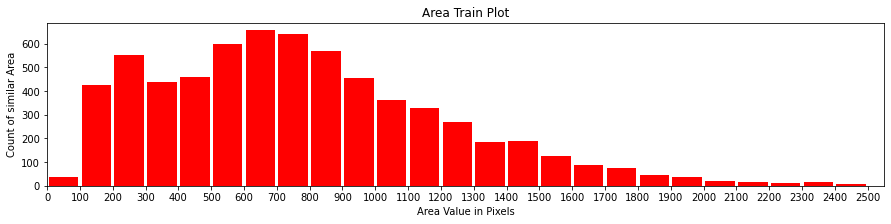

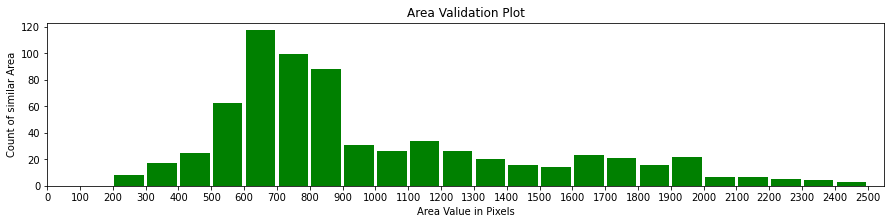

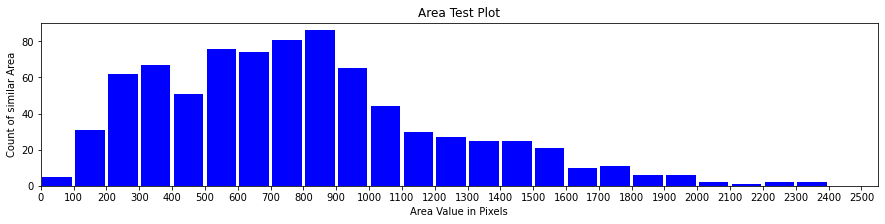

In [ ]:
squareRatioTrain = []
squareRatioValidation = []
squareRatioTest = []

train = pd.read_csv("/content/drive/MyDrive/CVproject_Stenosis/Dataset/CSV/train.csv")

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/train/*.bmp"):

  for _,row in train[train.filename == os.path.basename(filename)].iterrows():

    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax

    squareRatioTrain.append((xmax-xmin)*(ymax-ymin))

plt.figure(figsize=(15,3))
plt.title("Area Train Plot")
plt.xlabel("Area Value in Pixels")
plt.ylabel("Count of similar Area")
plt.xlim(0, 2550)
plt.xticks(arange(2550, step=100))

plt.hist(squareRatioTrain, bins=25, range=(0,2500), rwidth=0.9, color='r')
plt.show()


validation = pd.read_csv("/content/drive/MyDrive/CVproject_Stenosis/Dataset/CSV/validation.csv")

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/validation/*.bmp"):

  for _,row in validation[validation.filename == os.path.basename(filename)].iterrows():

    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax

    squareRatioValidation.append((xmax-xmin)*(ymax-ymin))

plt.figure(figsize=(15,3))
plt.title("Area Validation Plot")
plt.xlabel("Area Value in Pixels")
plt.ylabel("Count of similar Area")
plt.xlim(0, 2550)
plt.xticks(arange(2550, step=100))

plt.hist(squareRatioValidation, bins=25, range=(0,2500), rwidth=0.9, color='g')
plt.show()


test = pd.read_csv("/content/drive/MyDrive/CVproject_Stenosis/Dataset/CSV/test.csv")

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/test/*.bmp"):

  for _,row in test[test.filename == os.path.basename(filename)].iterrows():

    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax

    squareRatioTest.append((xmax-xmin)*(ymax-ymin))

plt.figure(figsize=(15,3))
plt.title("Area Test Plot")
plt.xlabel("Area Value in Pixels")
plt.ylabel("Count of similar Area")
plt.xlim(0, 2550)
plt.xticks(arange(2550, step=100))

plt.hist(squareRatioTest, bins=25, range=(0,2500), rwidth=0.9, color='b')
plt.show()

###Square Ratio Histogram between Bounding Box and Image

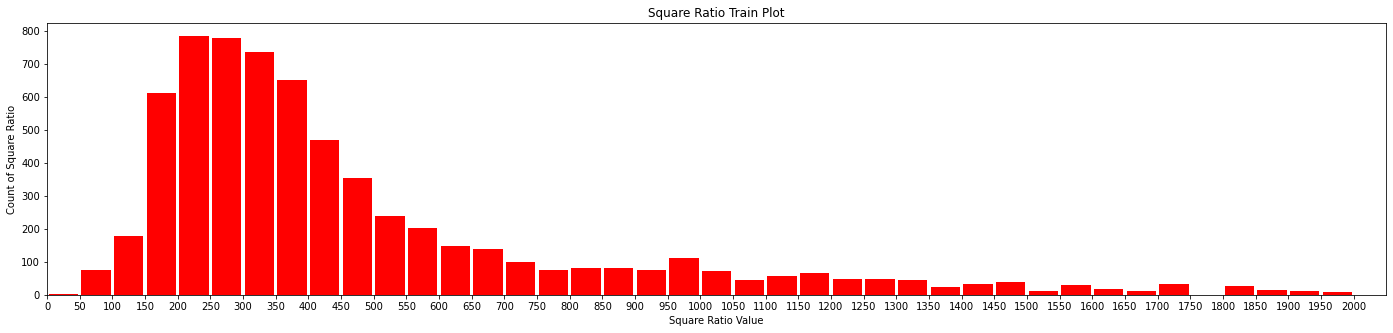

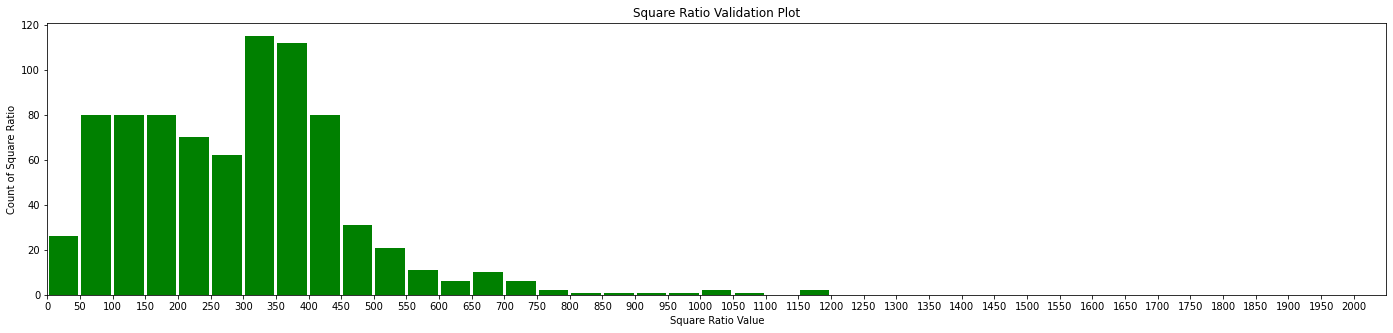

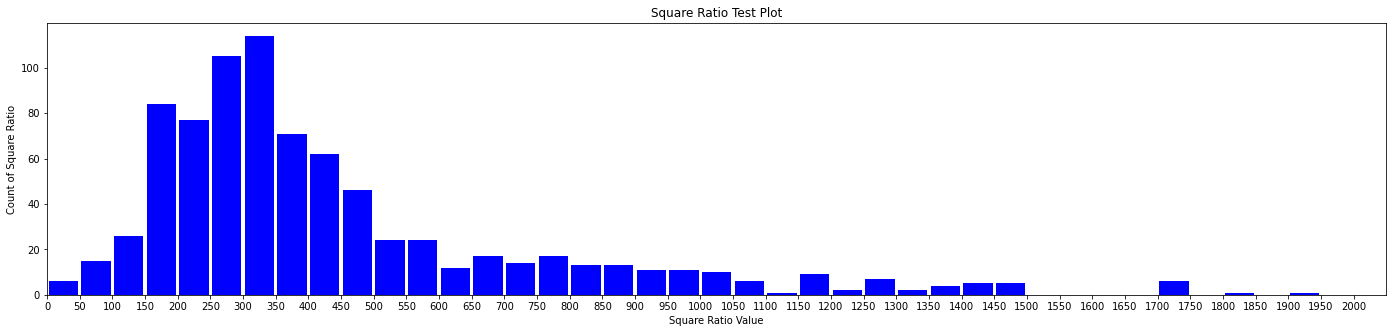

In [ ]:
squareRatioTrain = []
squareRatioValidation = []
squareRatioTest = []

train = pd.read_csv("/content/drive/MyDrive/CVproject_Stenosis/Dataset/CSV/train.csv")

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/train/*.bmp"):

  for _,row in train[train.filename == os.path.basename(filename)].iterrows():

    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax

    squareRatioTrain.append(round(262144/((xmax-xmin)*(ymax-ymin))))

plt.figure(figsize=(25,5))
plt.title("Square Ratio Train Plot")
plt.xlabel("Square Ratio Value")
plt.ylabel("Count of Square Ratio")
plt.xlim(0, 2050)
plt.xticks(arange(2050, step=50))

plt.hist(squareRatioTrain, bins=40, range=(0,2000), rwidth=0.9, color='r')
plt.show()


validation = pd.read_csv("/content/drive/MyDrive/CVproject_Stenosis/Dataset/CSV/validation.csv")

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/validation/*.bmp"):

  for _,row in validation[validation.filename == os.path.basename(filename)].iterrows():

    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax

    squareRatioValidation.append(round(262144/((xmax-xmin)*(ymax-ymin))))

plt.figure(figsize=(25,5))
plt.title("Square Ratio Validation Plot")
plt.xlabel("Square Ratio Value")
plt.ylabel("Count of Square Ratio")
plt.xlim(0, 2050)
plt.xticks(arange(2050, step=50))

plt.hist(squareRatioValidation, bins=40, range=(0,2000), rwidth=0.9, color='g')
plt.show()


test = pd.read_csv("/content/drive/MyDrive/CVproject_Stenosis/Dataset/CSV/test.csv")

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/test/*.bmp"):

  for _,row in test[test.filename == os.path.basename(filename)].iterrows():

    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax

    squareRatioTest.append(round(262144/((xmax-xmin)*(ymax-ymin))))

plt.figure(figsize=(25,5))
plt.title("Square Ratio Test Plot")
plt.xlabel("Square Ratio Value")
plt.ylabel("Count of Square Ratio")
plt.xlim(0, 2050)
plt.xticks(arange(2050, step=50))

plt.hist(squareRatioTest, bins=40, range=(0,2000), rwidth=0.9, color='b')
plt.show()

###Bounding Box Average Stats

AVERAGE BOUNDING BOX TRAIN

xmax and xmin: 218.7 188.1 
ymax and ymin: 178.4 152.6 
width: 30.64 
height: 25.85 
aspect ratio: 1.185 
Area of BB: 791.92 


AVERAGE BOUNDING BOX VALIDATION

xmax and xmin: 266.9 229.6 
ymax and ymin: 193.1 157.9 
width: 37.29 
height: 35.29 
aspect ratio: 1.057 
Area of BB: 1315.84 


AVERAGE BOUNDING BOX TEST

xmax and xmin: 224.2 192.5 
ymax and ymin: 180.8 153.8 
width: 31.66 
height: 27.06 
aspect ratio: 1.17 
Area of BB: 856.58 



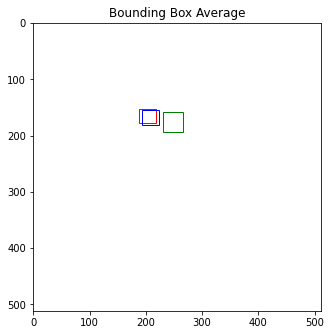

In [ ]:
countTrain = 0
countValidation = 0
countTest = 0
xmaxAverageTrain = 0
xminAverageTrain = 0
ymaxAverageTrain = 0
yminAverageTrain = 0
xmaxAverageValidation = 0
xminAverageValidation = 0
ymaxAverageValidation = 0
yminAverageValidation = 0
xmaxAverageTest = 0
xminAverageTest = 0
ymaxAverageTest = 0
yminAverageTest = 0

train = pd.read_csv("/content/drive/MyDrive/CVproject_Stenosis/Dataset/CSV/train.csv")

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/train/*.bmp"):

  for _,row in train[train.filename == os.path.basename(filename)].iterrows():

    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    xmaxAverageTrain += xmax
    xminAverageTrain += xmin
    ymaxAverageTrain += ymax
    yminAverageTrain += ymin
    
    countTrain+=1

xmaxAverageTrain /= countTrain
xminAverageTrain /= countTrain
ymaxAverageTrain /= countTrain
yminAverageTrain /= countTrain
widthAverageTrain = xmaxAverageTrain - xminAverageTrain
heightAverageTrain = ymaxAverageTrain - yminAverageTrain

print("AVERAGE BOUNDING BOX TRAIN\n"
      "\nxmax and xmin:", round(xmaxAverageTrain,1), round(xminAverageTrain,1), 
      "\nymax and ymin:", round(ymaxAverageTrain,1), round(yminAverageTrain,1),
      "\nwidth:", round(widthAverageTrain,2),
      "\nheight:", round(heightAverageTrain,2),
      "\naspect ratio:", round(widthAverageTrain/heightAverageTrain,3),
      "\nArea of BB:", round((widthAverageTrain)*(heightAverageTrain),2), "\n")

validation = pd.read_csv("/content/drive/MyDrive/CVproject_Stenosis/Dataset/CSV/validation.csv")

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/validation/*.bmp"):

  for _,row in validation[validation.filename == os.path.basename(filename)].iterrows():

    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    xmaxAverageValidation += xmax
    xminAverageValidation += xmin
    ymaxAverageValidation += ymax
    yminAverageValidation += ymin
    
    countValidation+=1

xmaxAverageValidation /= countValidation
xminAverageValidation /= countValidation
ymaxAverageValidation /= countValidation
yminAverageValidation /= countValidation
widthAverageValidation = xmaxAverageValidation - xminAverageValidation
heightAverageValidation = ymaxAverageValidation - yminAverageValidation

print("\nAVERAGE BOUNDING BOX VALIDATION\n"
      "\nxmax and xmin:", round(xmaxAverageValidation,1), round(xminAverageValidation,1), 
      "\nymax and ymin:", round(ymaxAverageValidation,1), round(yminAverageValidation,1),
      "\nwidth:", round(widthAverageValidation,2),
      "\nheight:", round(heightAverageValidation,2),
      "\naspect ratio:", round(widthAverageValidation/heightAverageValidation,3),
      "\nArea of BB:", round((widthAverageValidation)*(heightAverageValidation),2), "\n")

test = pd.read_csv("/content/drive/MyDrive/CVproject_Stenosis/Dataset/CSV/test.csv")

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/test/*.bmp"):

  for _,row in test[test.filename == os.path.basename(filename)].iterrows():

    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    xmaxAverageTest += xmax
    xminAverageTest += xmin
    ymaxAverageTest += ymax
    yminAverageTest += ymin
    
    countTest+=1

xmaxAverageTest /= countTest
xminAverageTest /= countTest
ymaxAverageTest /= countTest
yminAverageTest /= countTest
widthAverageTest = xmaxAverageTest - xminAverageTest
heightAverageTest = ymaxAverageTest - yminAverageTest

print("\nAVERAGE BOUNDING BOX TEST\n"
      "\nxmax and xmin:", round(xmaxAverageTest,1), round(xminAverageTest,1), 
      "\nymax and ymin:", round(ymaxAverageTest,1), round(yminAverageTest,1),
      "\nwidth:", round(widthAverageTest,2),
      "\nheight:", round(heightAverageTest,2),
      "\naspect ratio:", round(widthAverageTest/heightAverageTest,3),
      "\nArea of BB:", round((widthAverageTest)*(heightAverageTest),2), "\n")


fig = plt.figure()
ax = fig.add_axes([_,_,1,1])
image = plt.imread('/content/drive/MyDrive/Foto/white.jpg')
plt.title("Bounding Box Average")
plt.imshow(image)

averageTrainBB = patches.Rectangle((xminAverageTrain,yminAverageTrain), widthAverageTrain, heightAverageTrain, edgecolor = "r", facecolor = 'none')
averageValidationBB = patches.Rectangle((xminAverageValidation,yminAverageValidation), widthAverageValidation, heightAverageValidation, edgecolor = "g", facecolor = 'none')
averageTestBB = patches.Rectangle((xminAverageTest,yminAverageTest), widthAverageTest, heightAverageTest, edgecolor = "b", facecolor = 'none')

ax.add_patch(averageTrainBB)
ax.add_patch(averageValidationBB)
ax.add_patch(averageTestBB)

###Plot all Bounding Box for Training, Validation, Test and Average

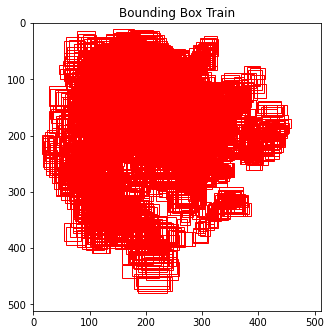

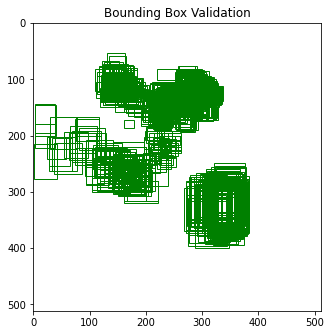

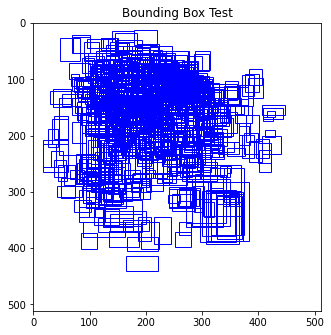

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/CVproject_Stenosis/Dataset/CSV/train.csv")

fig = plt.figure()
ax = fig.add_axes([_,_,1,1])
image = plt.imread('/content/drive/MyDrive/Foto/white.jpg')
plt.title("Bounding Box Train")
plt.imshow(image)

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/train/*.bmp"):

  for _,row in train[train.filename == os.path.basename(filename)].iterrows():

    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax

    averageTestBB = patches.Rectangle((xmin,ymin), xmax-xmin, ymax-ymin, edgecolor = "r", facecolor = 'none')
    ax.add_patch(averageTestBB)


validation = pd.read_csv("/content/drive/MyDrive/CVproject_Stenosis/Dataset/CSV/validation.csv")

fig = plt.figure()
ax = fig.add_axes([_,_,1,1])
plt.title("Bounding Box Validation")
plt.imshow(image)

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/validation/*.bmp"):

  for _,row in validation[validation.filename == os.path.basename(filename)].iterrows():

    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    averageTestBB = patches.Rectangle((xmin,ymin), xmax-xmin, ymax-ymin, edgecolor = "g", facecolor = 'none')
    ax.add_patch(averageTestBB)


test = pd.read_csv("/content/drive/MyDrive/CVproject_Stenosis/Dataset/CSV/test.csv")

fig = plt.figure()
ax = fig.add_axes([_,_,1,1])
plt.title("Bounding Box Test")
plt.imshow(image)

for filename in glob("/content/drive/MyDrive/CVproject_Stenosis/Dataset/Images/test/*.bmp"):

  for _,row in test[test.filename == os.path.basename(filename)].iterrows():

    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax

    averageTestBB = patches.Rectangle((xmin,ymin), xmax-xmin, ymax-ymin, edgecolor = "b", facecolor = 'none')
    ax.add_patch(averageTestBB)